In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
from scipy.stats import ttest_ind, levene

sns.set_style("whitegrid")
%matplotlib inline 
#Ensures that plots are displayed within the notebook.

### Read the CSV having MetaData

In [3]:
# Define paths for training and validation data
data_dir = "/home/hpc/iwfa/iwfa110h/Uddipan/regression_task_uddipan/Data/LinearWinding/dataset_linear_winding_multimodal"
train_subset = "train_val"
train_csv_file_path = os.path.join(data_dir, train_subset, "labels_and_metadata_coil_level_train_val_2023-09-15.CSV")


try:
    df = pd.read_csv(train_csv_file_path)
    print("CSV File loaded")
except FileNotFoundError: #This block catches the FileNotFoundError
    print(f"File not found at path :{train_csv_file_path}")
    raise # Re-raises the caught exception. This means after printing the custom message, the original FileNotFoundError is thrown again
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")
    raise

CSV File loaded


###  Display Data  and Information (we only choose 3 columns)

In [4]:
required_columns = ['coil_id', 'material_batch', 'label_dc_resistance']
df = df[required_columns]

# Display the first few rows of the data
print("First few rows of the data:")
display(df.head())
print("Last few rows of the data:")
display(df.tail())


First few rows of the data:


,coil_id,material_batch,label_dc_resistance
0,coil_001,1,2.5541
1,coil_002,1,2.5743
2,coil_004,1,2.5567
3,coil_006,1,2.5549
4,coil_007,1,2.5506


Last few rows of the data:


,coil_id,material_batch,label_dc_resistance
581,coil_726,2,2.6193
582,coil_727,2,2.6133
583,coil_728,2,2.6235
584,coil_729,2,2.6163
585,coil_730,2,2.6182


### How many coil is there for each material?

In [5]:
# Count the number of rows for each material_batch
batch_counts = df['material_batch'].value_counts().sort_index()

print("\nNumber of rows per material_batch:")
for batch, count in batch_counts.items():
    print(f"Material Batch {batch}: {count} rows")


Number of rows per material_batch:
Material Batch 1: 167 rows
Material Batch 2: 419 rows


In [6]:
df['material_batch'] = df['material_batch'].astype('category')

print("Data types after conversion:")
display(df.dtypes)

Data types after conversion:


coil_id                  object
material_batch         category
label_dc_resistance     float64
dtype: object

### Scatter Plot for resistance values based on Materail 1 and 2

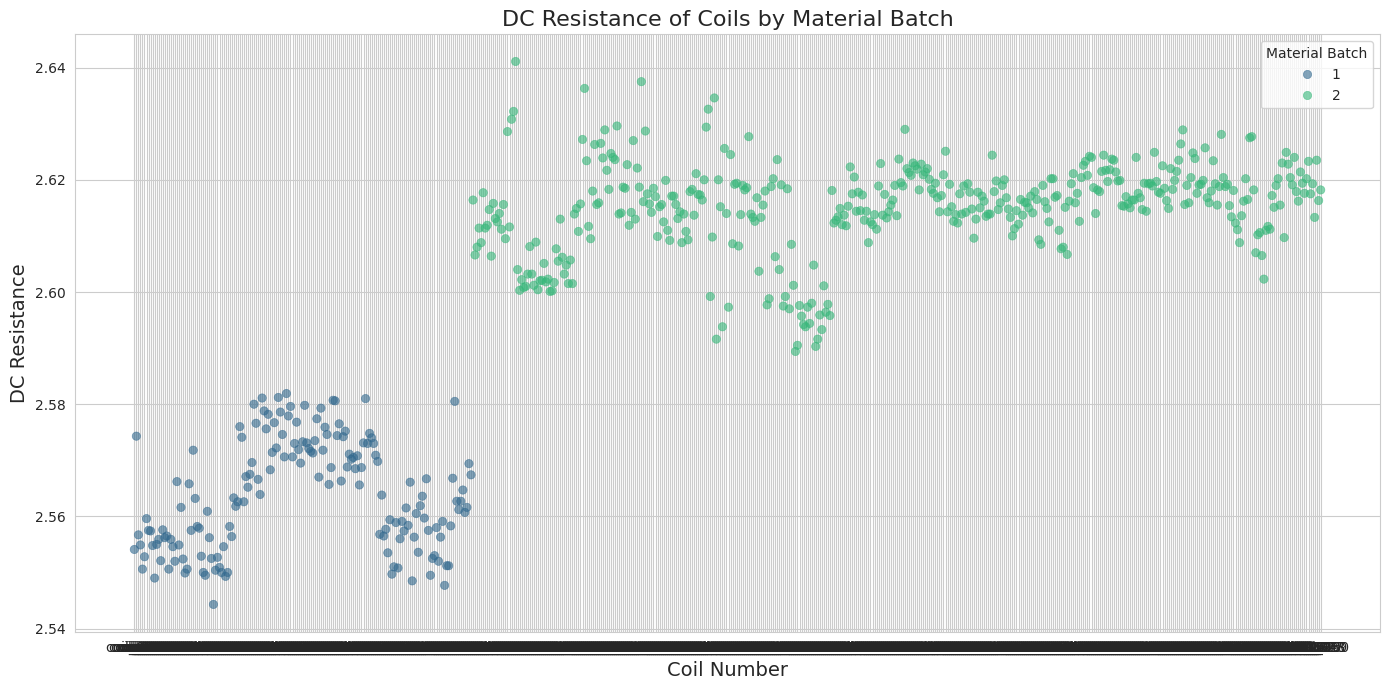

In [7]:
plt.figure(figsize=(14,7))

scatter = sns.scatterplot(
    data=df,
    x = 'coil_id',
    y='label_dc_resistance',
    hue='material_batch',
    palette='viridis',
    alpha=0.6,
    edgecolor=None
)



plt.title('DC Resistance of Coils by Material Batch', fontsize=16)
plt.xlabel('Coil Number', fontsize=14)
plt.ylabel('DC Resistance', fontsize=14)
plt.legend(title='Material Batch')
plt.tight_layout()
plt.show()

### Lineplot for resistance of Material 1 and 2

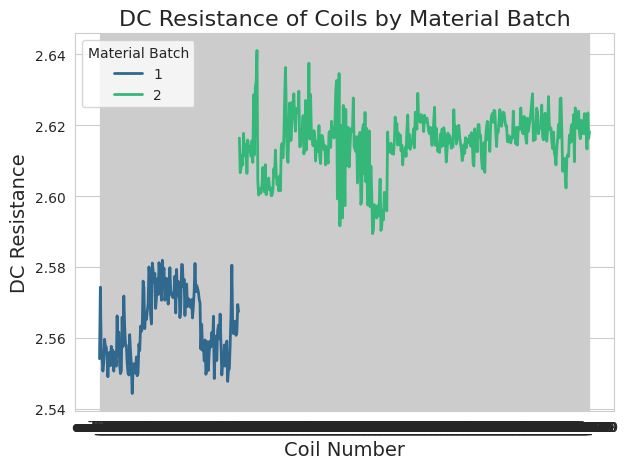

In [8]:
# Plot trend lines for each material batch
sns.lineplot(
    data=df,
    x='coil_id',
    y='label_dc_resistance',
    hue='material_batch',
    palette='viridis',
    errorbar=None,
    linewidth=2
)

plt.title('DC Resistance of Coils by Material Batch', fontsize=16)
plt.xlabel('Coil Number', fontsize=14)
plt.ylabel('DC Resistance', fontsize=14)
plt.legend(title='Material Batch')
plt.tight_layout()
plt.show()

### BOX PLOT for the resistance values of Materail 1 and 2

/tmp/ipykernel_3140311/103584466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


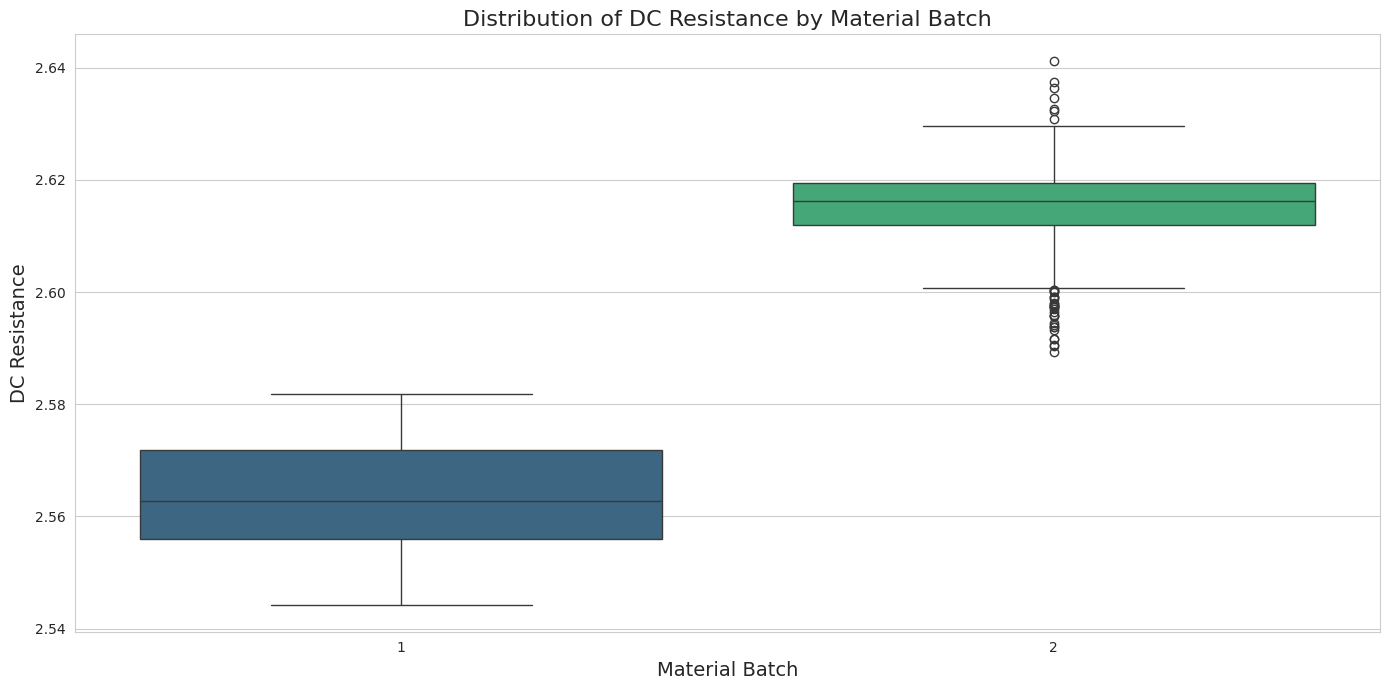

In [9]:
plt.figure(figsize=(14,7))

sns.boxplot(
    data = df,
    x = 'material_batch',
    y = 'label_dc_resistance',
    palette='viridis'
)

plt.title('Distribution of DC Resistance by Material Batch', fontsize=16)
plt.xlabel('Material Batch', fontsize=14)
plt.ylabel('DC Resistance', fontsize=14)
plt.tight_layout()
plt.show()

### Statistical Summary

In [10]:
# Calculate and display statistical summaries for each material batch
stat_summary = df.groupby('material_batch')['label_dc_resistance'].describe().round(3)
print("Statistical Summary by Material Batch:")
display(stat_summary)


Statistical Summary by Material Batch:


,count,mean,std,min,25%,50%,75%,max
material_batch,,,,,,,,
1,167.0,2.564,0.010,2.544,2.556,2.563,2.572,2.582
2,419.0,2.615,0.008,2.589,2.612,2.616,2.619,2.641


In [11]:
from scipy.stats import ttest_ind

# Separate data by material batch
batch1 = df[df['material_batch'] == 1]['label_dc_resistance']
batch2 = df[df['material_batch'] == 2]['label_dc_resistance']

# Perform Independent Samples t-Test
t_stat, p_val = ttest_ind(batch1, batch2, equal_var=True)  # Set equal_var=False if variances are unequal

print(f"T-Statistic: {t_stat:.3f}")
print(f"P-Value: {p_val:.3f}")

if p_val < 0.05:
    print("Result: Significant difference between material batches (Reject H0)")
else:
    print("Result: No significant difference between material batches (Fail to Reject H0)")


T-Statistic: -65.389
P-Value: 0.000
Result: Significant difference between material batches (Reject H0)


In [12]:
import numpy as np

# Calculate means and standard deviations
mean1 = batch1.mean()
mean2 = batch2.mean()
std1 = batch1.std()
std2 = batch2.std()

# Pooled standard deviation
pooled_std = np.sqrt(((std1 ** 2) + (std2 ** 2)) / 2)

# Cohen's d
cohen_d = (mean1 - mean2) / pooled_std
print(f"Cohen's d: {cohen_d:.3f}")

# Interpretation
if abs(cohen_d) < 0.2:
    interpretation = "Small effect"
elif abs(cohen_d) < 0.5:
    interpretation = "Medium effect"
else:
    interpretation = "Large effect"

print(f"Effect Size Interpretation: {interpretation}")


Cohen's d: -5.747
Effect Size Interpretation: Large effect


so using T test and Cohens test I guess we can confirm that there is a difference in resistance value for the two types of materials used in wire

## Now let us look at the force values for the coils based on the material of wires

#### load the force function


In [13]:
def load_force_values(pkl_path):
    """
    Loads a pickle file and extracts the 'force' values.

    Parameters:
        pkl_path (str): Path to the .pkl file.

    Returns:
        force_values (list or pd.Series): The extracted force values.
    """
    try:
        with open(pkl_path, 'rb') as file:
            data = pickle.load(file)
        
        # If the pickle is a DataFrame
        if isinstance(data, pd.DataFrame):
            if 'force' in data.columns:
                return data['force'].tolist()
            else:
                print(f"'force' column not found in DataFrame: {pkl_path}")
                return None
        
        # If the pickle is a dictionary
        elif isinstance(data, dict):
            if 'force' in data:
                return data['force']
            else:
                print(f"'force' key not found in dictionary: {pkl_path}")
                return None
        
        # If the pickle is a custom object with 'force' attribute
        elif hasattr(data, 'force'):
            return data.force
        
        else:
            print(f"Unknown data structure in pickle file: {pkl_path}")
            return None

    except FileNotFoundError:
        print(f"Pickle file not found: {pkl_path}")
        return None
    except Exception as e:
        print(f"Error loading pickle file {pkl_path}: {e}")
        return None


** force_data_batch_1 and force_data_batch_2 are dictionaries. **

 Each key in the dictionary is a coil_id (e.g., 'coil_001', 'coil_002', etc.).
 Each value is a list (or potentially a NumPy array) containing force values. Specifically, each list has a length of 57,621,

In [14]:
# Initialize dictionaries to store force values for each batch
force_data_batch_1 = {}
force_data_batch_2 = {}


### Load the data in the above two dictionaries using the load_force_values function

In [15]:
# Iterate through each row with a progress bar
for idx, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing coils"):
    coil_id = row['coil_id']
    material_batch = row['material_batch']
    subset = train_subset  # As defined earlier
    pkl_filename = f"{coil_id}_force_and_displacement_curves.pkl"
    curve_file_path = os.path.join(data_dir, subset, coil_id, pkl_filename)
    
    # Load force values
    force_values = load_force_values(curve_file_path)
    
    # Assign to the respective batch dictionary if force_values are present
    if force_values is not None:
        if material_batch == 1:
            force_data_batch_1[coil_id] = force_values
        elif material_batch == 2:
            force_data_batch_2[coil_id] = force_values
        else:
            print(f"Unknown material_batch {material_batch} for coil_id {coil_id}")


Processing coils:   0%|          | 0/586 [00:00<?, ?it/s]

Processing coils: 100%|██████████| 586/586 [00:12<00:00, 45.41it/s]


### Statistical description of the force curve of Material 1 and 2

In [16]:
# Function to compute aggregated statistics
def compute_stats(force_dict, batch_number):
    # Aggregate all force values into a single list
    all_force_values = []
    for coil, forces in force_dict.items():
        all_force_values.extend(forces)
    
    # Convert to pandas Series
    force_series = pd.Series(all_force_values)
    
    print(f"\nStatistics for Material Batch {batch_number}:")
    print(f"Total Coils: {len(force_dict)}")
    print(f"Total Force Values: {force_series.count()}")
    print(f"Mean: {force_series.mean():.4f}")
    print(f"Standard Deviation: {force_series.std():.4f}")
    print(f"Min: {force_series.min():.4f}")
    print(f"25th Percentile: {force_series.quantile(0.25):.4f}")
    print(f"Median: {force_series.median():.4f}")
    print(f"75th Percentile: {force_series.quantile(0.75):.4f}")
    print(f"Max: {force_series.max():.4f}")
    
    return force_series

# Compute and display stats for both batches
force_series_batch_1 = compute_stats(force_data_batch_1, 1)
force_series_batch_2 = compute_stats(force_data_batch_2, 2)



Statistics for Material Batch 1:
Total Coils: 167
Total Force Values: 9622707
Mean: 20.0748
Standard Deviation: 1.7018
Min: 3.2900
25th Percentile: 19.1200
Median: 19.9200
75th Percentile: 20.8000
Max: 38.3300

Statistics for Material Batch 2:
Total Coils: 419
Total Force Values: 24143199
Mean: 19.5221
Standard Deviation: 1.5604
Min: -0.0000
25th Percentile: 18.6500
Median: 19.2300
75th Percentile: 20.1400
Max: 37.3400


We see that for material 1 we have a higher mean force value of 20 Newtona and for material 2 we have the mean of force curve as 19.23 Newton

force_series_batch_1 is a single pandas Series containing all force measurements from all coils concatenated together for batch 1.
force_series_batch_2 is a single pandas Series containing all force measurements from all coils concatenated together for batch 2. 
Is this a correct approach? I mean I lose the association between individual force measurements and their respective coil_ids but I guess it is Useful for understanding the general distribution of force values across all coils for a particular batch.

#### We combined the force data for boxplot but later we contuniue to use force_series_batch_1 and force_series_batch_1 seperately

/tmp/ipykernel_3140311/290783605.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='material_batch', y='force', data=combined_force, palette='Set2')


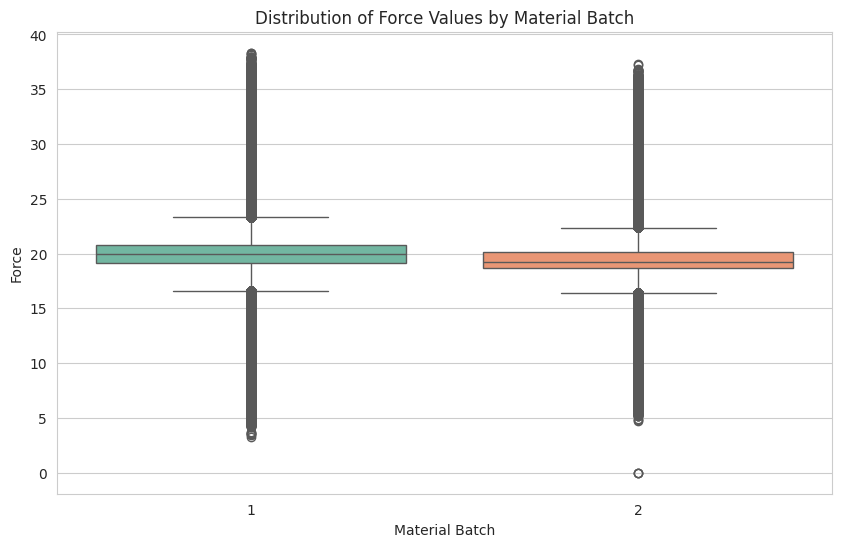

In [17]:
# Create a combined DataFrame for visualization
combined_force = pd.DataFrame({
    'force': force_series_batch_1.tolist() + force_series_batch_2.tolist(),
    'material_batch': [1]*len(force_series_batch_1) + [2]*len(force_series_batch_2)
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='material_batch', y='force', data=combined_force, palette='Set2')
plt.title('Distribution of Force Values by Material Batch')
plt.xlabel('Material Batch')
plt.ylabel('Force')
plt.show()


seperate boxplot view on force_series_batch_1 

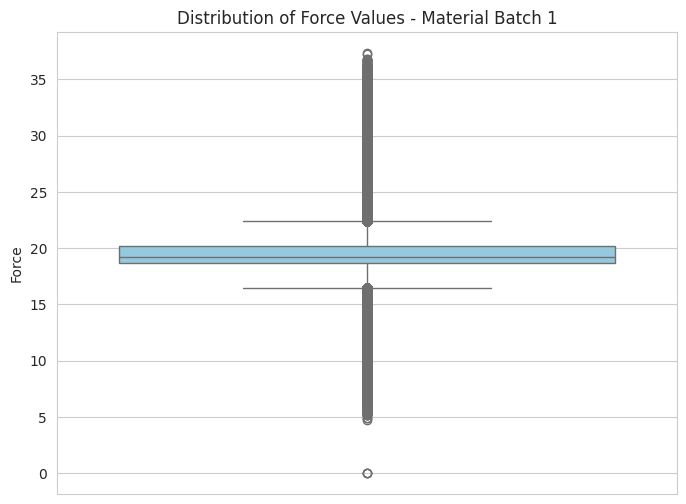

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=force_series_batch_1, color='skyblue')
plt.title('Distribution of Force Values - Material Batch 1')
plt.ylabel('Force')
plt.show()


seperate boxplot view on force_series_batch_2

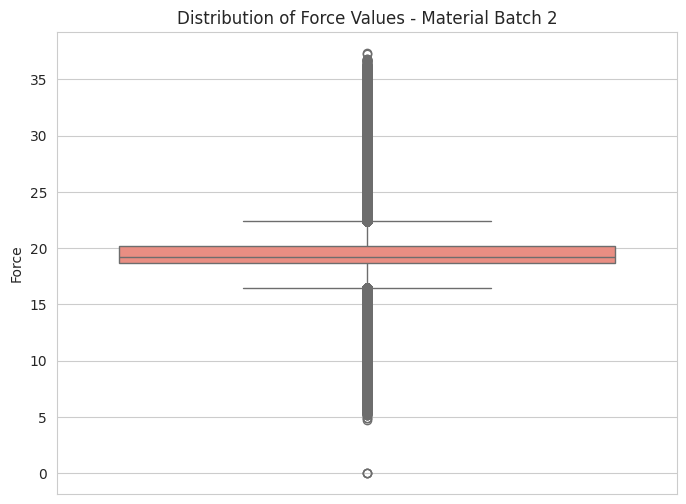

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=force_series_batch_2, color='salmon')
plt.title('Distribution of Force Values - Material Batch 2')
plt.ylabel('Force')
plt.show()


### Histogram for force_series_batch_1

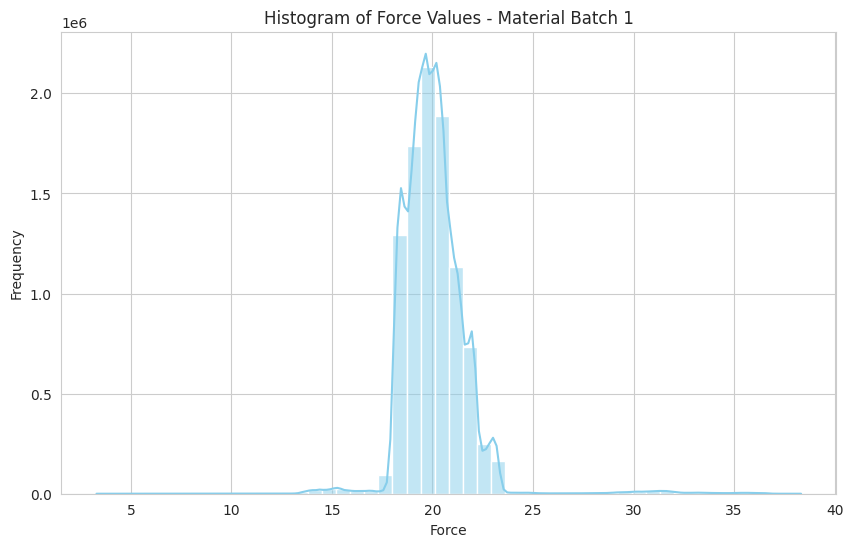

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(force_series_batch_1, bins=50, kde=True, color='skyblue')
plt.title('Histogram of Force Values - Material Batch 1')
plt.xlabel('Force')
plt.ylabel('Frequency')
plt.show()


### force_series_batch_2 Histogram

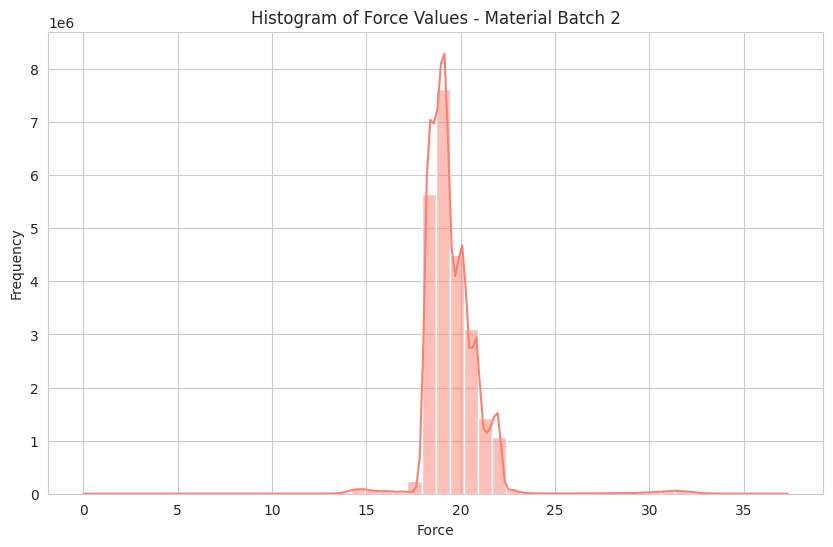

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(force_series_batch_2, bins=50, kde=True, color='salmon')
plt.title('Histogram of Force Values - Material Batch 2')
plt.xlabel('Force')
plt.ylabel('Frequency')
plt.show()


#### Now we calculate mean of force curve for each coil_id, so now for each coil_id we have thier mean force value (instead of 57621 values we now have 1, the mean)

In [22]:
# Function to compute mean force per coil
def compute_mean_force(force_dict):
    """
    Computes the mean force for each coil.

    Parameters:
        force_dict (dict): Dictionary with coil_id as keys and list of force values as values.

    Returns:
        mean_force_series (pd.Series): Series with coil_id as index and mean force as values.
    """
    mean_force = {coil_id: np.mean(forces) for coil_id, forces in force_dict.items()}
    return pd.Series(mean_force)
    
# Compute mean force for each batch
mean_force_batch_1 = compute_mean_force(force_data_batch_1)
mean_force_batch_2 = compute_mean_force(force_data_batch_2)

# Display the first few mean force values for verification
print("First few mean force values for Material Batch 1:")
display(mean_force_batch_1.head())

print("\nFirst few mean force values for Material Batch 2:")
display(mean_force_batch_2.head())


First few mean force values for Material Batch 1:


coil_001    19.317325
coil_002    19.338130
coil_004    19.384552
coil_006    19.411695
coil_007    19.434810
dtype: float64


First few mean force values for Material Batch 2:


coil_214    19.457028
coil_216    19.441428
coil_217    19.435260
coil_218    19.433564
coil_219    19.427665
dtype: float64

#### Statistical Description based on the mean

In [23]:
# Function to display statistics
def display_mean_stats(mean_series, batch_number):
    print(f"\nStatistics for Mean Force Values - Material Batch {batch_number}:")
    print(f"Total Coils: {mean_series.count()}")
    print(f"Mean of Means: {mean_series.mean():.4f}")
    print(f"Standard Deviation of Means: {mean_series.std():.4f}")
    print(f"Min: {mean_series.min():.4f}")
    print(f"25th Percentile: {mean_series.quantile(0.25):.4f}")
    print(f"Median: {mean_series.median():.4f}")
    print(f"75th Percentile: {mean_series.quantile(0.75):.4f}")
    print(f"Max: {mean_series.max():.4f}")

# Display statistics for both batches
display_mean_stats(mean_force_batch_1, 1)
display_mean_stats(mean_force_batch_2, 2)



Statistics for Mean Force Values - Material Batch 1:
Total Coils: 167
Mean of Means: 20.0748
Standard Deviation of Means: 0.6273
Min: 19.1400
25th Percentile: 19.4781
Median: 19.6053
75th Percentile: 20.7666
Max: 20.8259

Statistics for Mean Force Values - Material Batch 2:
Total Coils: 419
Mean of Means: 19.5221
Standard Deviation of Means: 0.1853
Min: 19.1288
25th Percentile: 19.4421
Median: 19.5117
75th Percentile: 19.5497
Max: 20.6916


### Histogram of the mean of force curves for all the coils of material 1

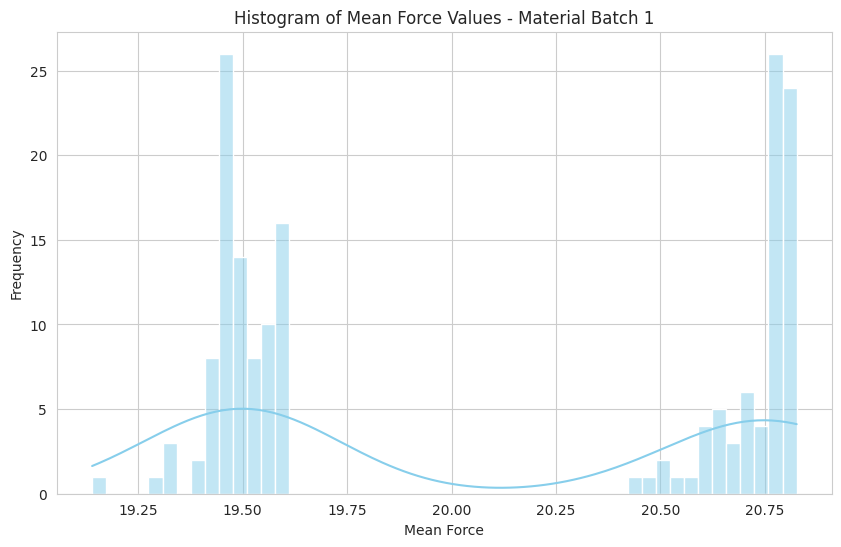

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(mean_force_batch_1, bins=50, kde=True, color='skyblue')
plt.title('Histogram of Mean Force Values - Material Batch 1')
plt.xlabel('Mean Force')
plt.ylabel('Frequency')
plt.show()


### Histogram of the mean of force curves for all the coils of material 2

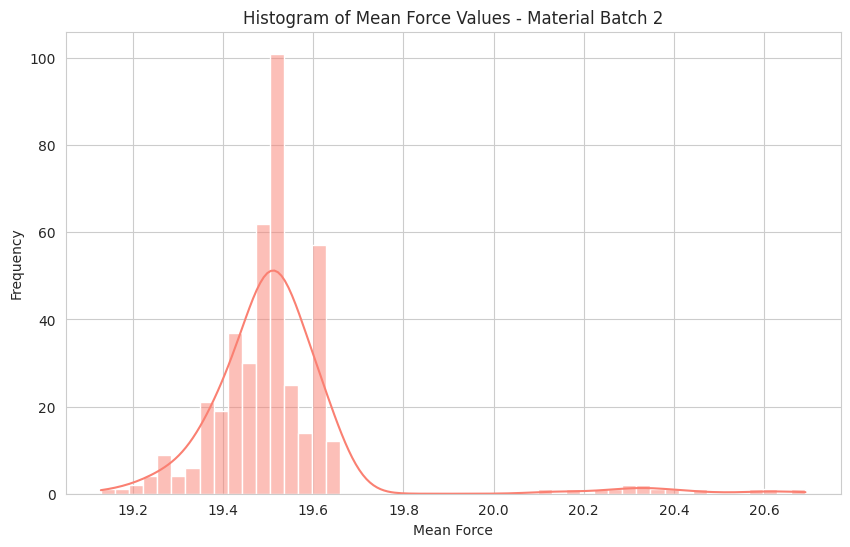

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(mean_force_batch_2, bins=50, kde=True, color='salmon')
plt.title('Histogram of Mean Force Values - Material Batch 2')
plt.xlabel('Mean Force')
plt.ylabel('Frequency')
plt.show()


### Boxplot of the mean of force curves for all the coils of material 1

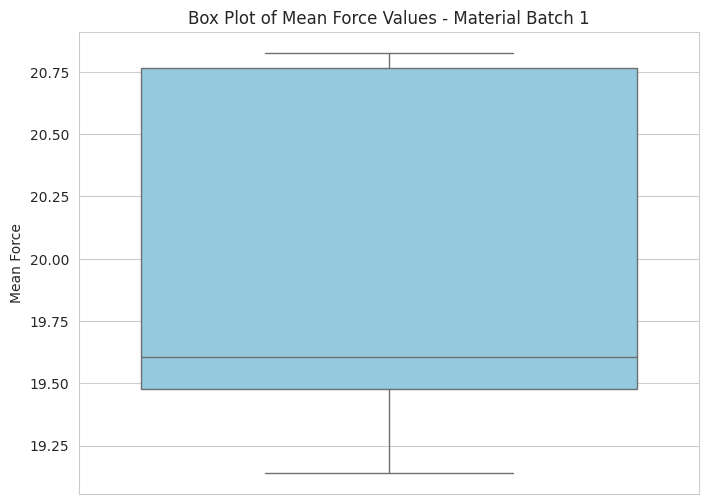

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=mean_force_batch_1, color='skyblue')
plt.title('Box Plot of Mean Force Values - Material Batch 1')
plt.ylabel('Mean Force')
plt.show()


### Boxplot of the mean of force curves for all the coils of material 2

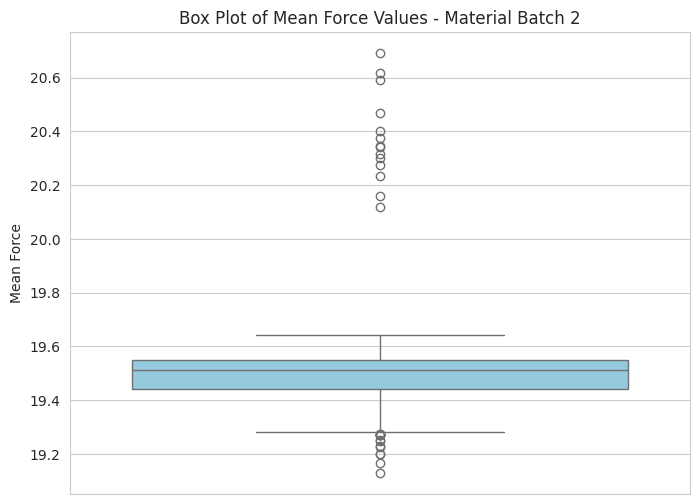

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=mean_force_batch_2, color='skyblue')
plt.title('Box Plot of Mean Force Values - Material Batch 2')
plt.ylabel('Mean Force')
plt.show()


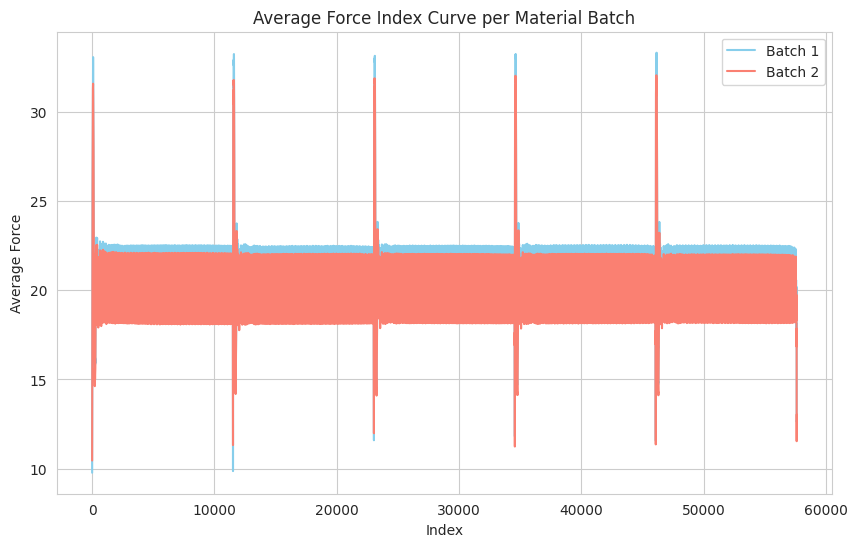

In [28]:
import numpy as np

# Function to compute average force index
def average_force_index(force_dict):
    # Find the maximum length of force lists
    max_length = max(len(forces) for forces in force_dict.values())
    
    # Initialize a list to store interpolated force values
    interpolated_forces = []
    
    for forces in force_dict.values():
        # If force list is shorter than max_length, pad with NaNs
        if len(forces) < max_length:
            forces_extended = forces + [np.nan]*(max_length - len(forces))
        else:
            forces_extended = forces[:max_length]
        interpolated_forces.append(forces_extended)
    
    # Convert to DataFrame
    force_df = pd.DataFrame(interpolated_forces)
    
    # Compute mean across rows, ignoring NaNs
    mean_force = force_df.mean(axis=0)
    
    return mean_force

# Compute average force curves
average_force_batch_1 = average_force_index(force_data_batch_1)
average_force_batch_2 = average_force_index(force_data_batch_2)

# Plot average force curves
plt.figure(figsize=(10, 6))
plt.plot(average_force_batch_1, label='Batch 1', color='skyblue')
plt.plot(average_force_batch_2, label='Batch 2', color='salmon')
plt.title('Average Force Index Curve per Material Batch')
plt.xlabel('Index')
plt.ylabel('Average Force')
plt.legend()
plt.show()


## Hypothesis Testing (T- Test)

In [29]:
# 2. Check for Equality of Variances (Levene's Test)
levene_stat, levene_p = levene(mean_force_batch_1, mean_force_batch_2)
print(f"Levene's Test - Statistic: {levene_stat:.4f}, P-value: {levene_p:.4f}")


Levene's Test - Statistic: 306.2793, P-value: 0.0000


T-statistic: A high value (306.2793) suggests a significant difference in variances which is statistically significant

### T Test between actual force values of batch material 1 and 2

In [30]:
from scipy.stats import ttest_ind

# Extract force values
force_batch_1 = combined_force[combined_force['material_batch'] == 1]['force']
force_batch_2 = combined_force[combined_force['material_batch'] == 2]['force']

# Perform t-test
t_stat, p_val = ttest_ind(force_batch_1, force_batch_2, equal_var=False)
#same as doing below
#t_stat, p_val = ttest_ind(force_series_batch_1, force_series_batch_2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("The difference in force values between batches is statistically significant.")
else:
    print("No statistically significant difference in force values between batches.")


T-statistic: 871.9400, P-value: 0.0000
The difference in force values between batches is statistically significant.


### T Test between mean force values of batch material 1 and 2

In [31]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_val = ttest_ind(mean_force_batch_1, mean_force_batch_2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("The difference in mean force values between batches is statistically significant.")
else:
    print("No statistically significant difference in mean force values between batches.")


T-statistic: 11.1935, P-value: 0.0000
The difference in mean force values between batches is statistically significant.


### Correlation between force(mean value of each coil) and Resistance of that respective coil

In [32]:
print("First few mean force values for Material Batch 1:")
display(mean_force_batch_1.head())

print("\nFirst few mean force values for Material Batch 2:")
display(mean_force_batch_2.head())

First few mean force values for Material Batch 1:


coil_001    19.317325
coil_002    19.338130
coil_004    19.384552
coil_006    19.411695
coil_007    19.434810
dtype: float64


First few mean force values for Material Batch 2:


coil_214    19.457028
coil_216    19.441428
coil_217    19.435260
coil_218    19.433564
coil_219    19.427665
dtype: float64

In [33]:
# Reset index to have 'coil_id' as a column
mean_force_batch_1 = mean_force_batch_1.reset_index()
mean_force_batch_1.columns = ['coil_id', 'mean_force']

mean_force_batch_2 = mean_force_batch_2.reset_index()
mean_force_batch_2.columns = ['coil_id', 'mean_force']

# Merge with the original DataFrame to get 'label_dc_resistance'
merged_batch_1 = pd.merge(mean_force_batch_1, df[['coil_id', 'label_dc_resistance']], on='coil_id', how='left')
merged_batch_2 = pd.merge(mean_force_batch_2, df[['coil_id', 'label_dc_resistance']], on='coil_id', how='left')

# Display the first few rows for verification
print("First few rows of merged data - Material Batch 1:")
display(merged_batch_1.head())

print("\nFirst few rows of merged data - Material Batch 2:")
display(merged_batch_2.head())


First few rows of merged data - Material Batch 1:


,coil_id,mean_force,label_dc_resistance
0,coil_001,19.317325,2.5541
1,coil_002,19.338130,2.5743
2,coil_004,19.384552,2.5567
3,coil_006,19.411695,2.5549
4,coil_007,19.434810,2.5506



First few rows of merged data - Material Batch 2:


,coil_id,mean_force,label_dc_resistance
0,coil_214,19.457028,2.6164
1,coil_216,19.441428,2.6066
2,coil_217,19.435260,2.6080
3,coil_218,19.433564,2.6114
4,coil_219,19.427665,2.6088


In [34]:
from scipy.stats import pearsonr, spearmanr

# Function to compute Pearson and Spearman correlations
def compute_correlations(merged_df, batch_number):
    """
    Computes Pearson and Spearman correlations between mean_force and label_dc_resistance.

    Parameters:
        merged_df (pd.DataFrame): DataFrame containing 'mean_force' and 'label_dc_resistance'.
        batch_number (int): Material batch number for labeling.

    Returns:
        None
    """
    pearson_corr, pearson_p = pearsonr(merged_df['mean_force'], merged_df['label_dc_resistance'])
    spearman_corr, spearman_p = spearmanr(merged_df['mean_force'], merged_df['label_dc_resistance'])
    
    print(f"Material Batch {batch_number}:")
    print(f"Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
    print(f"Spearman Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.4f})\n")

# Compute correlations for Batch 1
compute_correlations(merged_batch_1, 1)

# Compute correlations for Batch 2
compute_correlations(merged_batch_2, 2)


Material Batch 1:
Pearson Correlation: 0.7974 (p-value: 0.0000)
Spearman Correlation: 0.6758 (p-value: 0.0000)

Material Batch 2:
Pearson Correlation: 0.2619 (p-value: 0.0000)
Spearman Correlation: 0.2887 (p-value: 0.0000)



Material Batch 1 exhibits a strong correlation, both Pearson and Spearman, between mean force and resistance.This indicates a strong positive linear relationship between the mean force values and label_dc_resistance

Material Batch 2 shows a weak correlation, a weak positive linear relationship between the mean force values and label_dc_resistance.

### Correlation on other features of force and resistance

In [60]:
from scipy.stats import kurtosis, skew

# Function to compute multiple statistics including kurtosis and skewness
def compute_force_features(force_dict):
    """
    Computes multiple statistical features for each coil.

    Parameters:
        force_dict (dict): Dictionary with coil_id as keys and list of force values as values.

    Returns:
        features_df (pd.DataFrame): DataFrame containing statistical features for each coil.
    """
    features = {
        'mean_force': [],
        'median_force': [],
        'std_force': [],
        'min_force': [],
        'max_force': [],
        '25th_percentile': [],
        '75th_percentile': [],
        'range_force': [],
        'iqr_force': [],
        'kurtosis_force': [],
        'skew_force': []
    }
    coil_ids = []
    
    for coil_id, forces in force_dict.items():
        coil_ids.append(coil_id)
        forces_np = np.array(forces)
        
        # Basic Statistical Features
        features['mean_force'].append(np.mean(forces_np))
        features['median_force'].append(np.median(forces_np))
        features['std_force'].append(np.std(forces_np, ddof=1))
        features['min_force'].append(np.min(forces_np))
        features['max_force'].append(np.max(forces_np))
        features['25th_percentile'].append(np.percentile(forces_np, 25))
        features['75th_percentile'].append(np.percentile(forces_np, 75))
        
        # Additional Statistical Features
        features['range_force'].append(np.ptp(forces_np))  # Range = max - min
        features['iqr_force'].append(np.percentile(forces_np, 75) - np.percentile(forces_np, 25))  # IQR
        features['kurtosis_force'].append(kurtosis(forces_np))
        features['skew_force'].append(skew(forces_np))
    
    features_df = pd.DataFrame(features, index=coil_ids).reset_index()
    features_df = features_df.rename(columns={'index': 'coil_id'})
    return features_df


In [61]:
# Compute features for both batches using the enhanced function
features_batch_1 = compute_force_features(force_data_batch_1)
features_batch_2 = compute_force_features(force_data_batch_2)


In [62]:
# Merge with resistance labels for Batch 1
merged_features_batch_1 = pd.merge(features_batch_1, df[['coil_id', 'label_dc_resistance']], on='coil_id', how='left')

# Merge with resistance labels for Batch 2
merged_features_batch_2 = pd.merge(features_batch_2, df[['coil_id', 'label_dc_resistance']], on='coil_id', how='left')


In [63]:
# Display first few rows
print("First few rows of merged features - Batch 1:")
display(merged_features_batch_1.head())

print("\nFirst few rows of merged features - Batch 2:")
display(merged_features_batch_2.head())


First few rows of merged features - Batch 1:


,coil_id,mean_force,median_force,std_force,min_force,max_force,25th_percentile,75th_percentile,range_force,iqr_force,kurtosis_force,skew_force,label_dc_resistance
0,coil_001,19.317325,19.010000,1.577285,4.46,31.139999,18.430000,19.940001,26.679999,1.510000,19.098397,1.726607,2.5541
1,coil_002,19.338130,19.049999,1.563745,4.32,30.940001,18.459999,19.950001,26.620000,1.490002,18.882073,1.722197,2.5743
2,coil_004,19.384552,19.070000,1.554278,4.47,31.190001,18.520000,20.000000,26.720001,1.480000,18.587397,1.823657,2.5567
3,coil_006,19.411695,19.110001,1.553561,5.03,31.379999,18.540001,20.049999,26.349999,1.509998,18.440117,1.905937,2.5549
4,coil_007,19.434810,19.170000,1.550517,4.80,31.670000,18.580000,20.040001,26.870000,1.460001,19.161684,1.933415,2.5506



First few rows of merged features - Batch 2:


,coil_id,mean_force,median_force,std_force,min_force,max_force,25th_percentile,75th_percentile,range_force,iqr_force,kurtosis_force,skew_force,label_dc_resistance
0,coil_214,19.457028,19.190001,1.582558,7.03,32.919998,18.610001,20.070000,25.889998,1.459999,25.660133,3.213672,2.6164
1,coil_216,19.441428,19.139999,1.601738,7.00,32.549999,18.570000,20.090000,25.549999,1.520000,24.696433,3.128897,2.6066
2,coil_217,19.435260,19.139999,1.605593,7.05,33.020000,18.540001,20.059999,25.970000,1.519999,25.018780,3.159709,2.6080
3,coil_218,19.433564,19.120001,1.592831,7.37,32.590000,18.570000,20.070000,25.220000,1.500000,25.702482,3.329982,2.6114
4,coil_219,19.427665,19.150000,1.604604,4.85,34.349998,18.570000,20.040001,29.499999,1.470001,26.111479,3.046001,2.6088


In [64]:
# Function to compute correlations for multiple features including the new ones
def compute_multiple_correlations(merged_df, batch_number):
    """
    Computes Pearson and Spearman correlations between multiple features and label_dc_resistance.

    Parameters:
        merged_df (pd.DataFrame): DataFrame containing features and 'label_dc_resistance'.
        batch_number (int): Material batch number for labeling.

    Returns:
        None
    """
    # List of all features including the new ones
    features = [
        'mean_force', 'median_force', 'std_force', 'min_force', 'max_force',
        '25th_percentile', '75th_percentile', 'range_force', 'iqr_force',
        'kurtosis_force', 'skew_force'
    ]
    
    print(f"Material Batch {batch_number}:")
    for feature in features:
        # Drop NaN values for accurate correlation computation
        valid_data = merged_df[[feature, 'label_dc_resistance']].dropna()
        
        # Check if there's enough data to compute correlation
        if valid_data.shape[0] < 2:
            print(f"{feature}: Not enough data to compute correlation.")
            continue
        
        pearson_corr, pearson_p = pearsonr(valid_data[feature], valid_data['label_dc_resistance'])
        spearman_corr, spearman_p = spearmanr(valid_data[feature], valid_data['label_dc_resistance'])
        print(f"{feature}: Pearson r = {pearson_corr:.4f} (p-value: {pearson_p:.4f}), Spearman rho = {spearman_corr:.4f} (p-value: {spearman_p:.4f})")
    print("\n")


In [65]:
# Compute correlations for Batch 1
compute_multiple_correlations(merged_features_batch_1, 1)

# Compute correlations for Batch 2
compute_multiple_correlations(merged_features_batch_2, 2)


Material Batch 1:
mean_force: Pearson r = 0.7974 (p-value: 0.0000), Spearman rho = 0.6758 (p-value: 0.0000)
median_force: Pearson r = 0.7977 (p-value: 0.0000), Spearman rho = 0.6725 (p-value: 0.0000)
std_force: Pearson r = 0.3480 (p-value: 0.0000), Spearman rho = 0.4540 (p-value: 0.0000)
min_force: Pearson r = 0.6603 (p-value: 0.0000), Spearman rho = 0.7396 (p-value: 0.0000)
max_force: Pearson r = 0.7841 (p-value: 0.0000), Spearman rho = 0.7267 (p-value: 0.0000)
25th_percentile: Pearson r = 0.7971 (p-value: 0.0000), Spearman rho = 0.6632 (p-value: 0.0000)
75th_percentile: Pearson r = 0.7977 (p-value: 0.0000), Spearman rho = 0.6637 (p-value: 0.0000)
range_force: Pearson r = -0.0610 (p-value: 0.4334), Spearman rho = -0.0225 (p-value: 0.7731)
iqr_force: Pearson r = -0.4030 (p-value: 0.0000), Spearman rho = -0.4040 (p-value: 0.0000)
kurtosis_force: Pearson r = 0.7742 (p-value: 0.0000), Spearman rho = 0.7201 (p-value: 0.0000)
skew_force: Pearson r = 0.7627 (p-value: 0.0000), Spearman rho = 